In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

<AxesSubplot:>

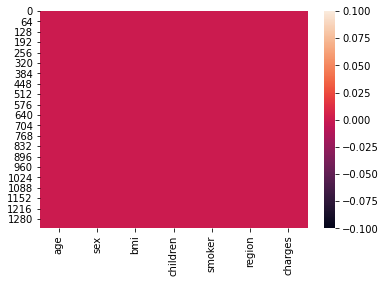

In [8]:
sns.heatmap(data.isnull())

In [9]:
#can't analyse strings ,so we are converting them into int
male=pd.get_dummies(data['sex'],drop_first=True)

In [10]:
type(male)

pandas.core.frame.DataFrame

In [11]:
male

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [12]:
smoking=pd.get_dummies(data['smoker'],drop_first=True)
smoking

,yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [13]:
data=data.join([smoking,male])

In [14]:
data

,age,sex,bmi,children,smoker,region,charges,yes,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [15]:
data.loc[data['region']=='southwest','region']=1
data.loc[data['region']=='southeast','region']=2
data.loc[data['region']=='northwest','region']=3
data.loc[data['region']=='northeast','region']=4

In [16]:
data

,age,sex,bmi,children,smoker,region,charges,yes,male
0,19,female,27.900,0,yes,1,16884.92400,1,0
1,18,male,33.770,1,no,2,1725.55230,0,1
2,28,male,33.000,3,no,2,4449.46200,0,1
3,33,male,22.705,0,no,3,21984.47061,0,1
4,32,male,28.880,0,no,3,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,3,10600.54830,0,1
1334,18,female,31.920,0,no,4,2205.98080,0,0
1335,18,female,36.850,0,no,2,1629.83350,0,0
1336,21,female,25.800,0,no,1,2007.94500,0,0


In [17]:
data.drop(['smoker','sex'],axis=1,inplace=True)

In [18]:
data

,age,bmi,children,region,charges,yes,male
0,19,27.900,0,1,16884.92400,1,0
1,18,33.770,1,2,1725.55230,0,1
2,28,33.000,3,2,4449.46200,0,1
3,33,22.705,0,3,21984.47061,0,1
4,32,28.880,0,3,3866.85520,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,3,10600.54830,0,1
1334,18,31.920,0,4,2205.98080,0,0
1335,18,36.850,0,2,1629.83350,0,0
1336,21,25.800,0,1,2007.94500,0,0


In [19]:
pd.DataFrame.rename(data,columns={'yes':'smoking'})

,age,bmi,children,region,charges,smoking,male
0,19,27.900,0,1,16884.92400,1,0
1,18,33.770,1,2,1725.55230,0,1
2,28,33.000,3,2,4449.46200,0,1
3,33,22.705,0,3,21984.47061,0,1
4,32,28.880,0,3,3866.85520,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,3,10600.54830,0,1
1334,18,31.920,0,4,2205.98080,0,0
1335,18,36.850,0,2,1629.83350,0,0
1336,21,25.800,0,1,2007.94500,0,0


In [20]:
#Data Visualization

<AxesSubplot:>

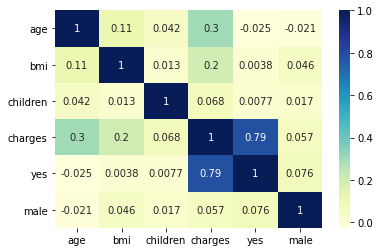

In [21]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

In [22]:
#through this heatmap, we can say the charges are strongly correlated with age,bmi and smoking.

<AxesSubplot:xlabel='bmi', ylabel='Count'>

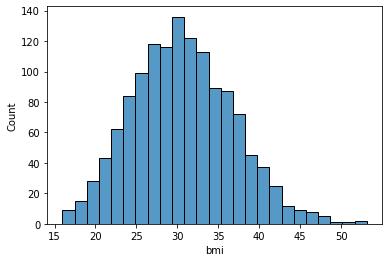

In [23]:
sns.histplot(data['bmi'])

<AxesSubplot:xlabel='charges', ylabel='Count'>

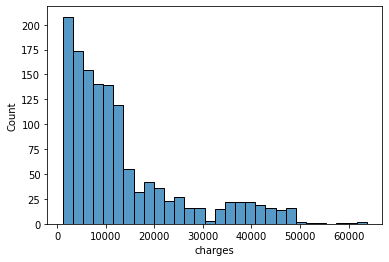

In [24]:
sns.histplot(data['charges'])

In [25]:
#few members are spending more,most of the people are spending less than 15000.

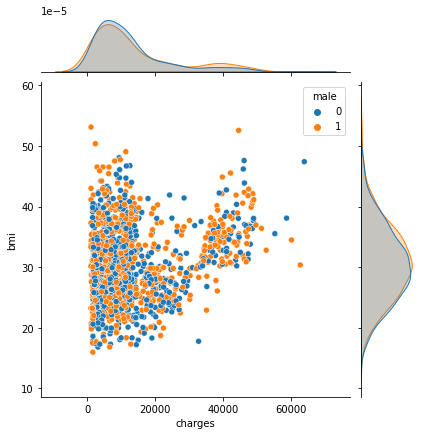

In [26]:
sns.jointplot(x='charges',y='bmi',data=data,hue='male')

In [27]:
#both male and female are equally distributed

<AxesSubplot:xlabel='male', ylabel='count'>

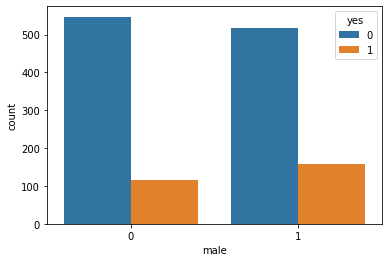

In [28]:
sns.countplot(x='male',data=data,hue='yes')

c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='male', ylabel='charges'>

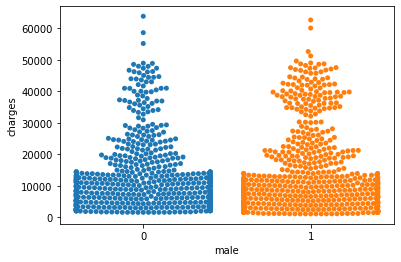

In [29]:
sns.swarmplot(x="male",y="charges",data=data)

In [30]:
#both genders  are doing almost same

<AxesSubplot:xlabel='male', ylabel='charges'>

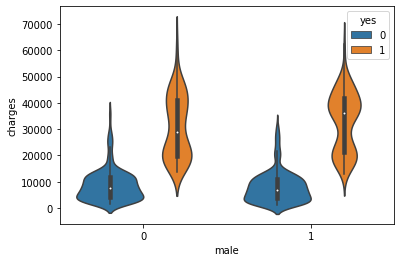

In [31]:
sns.violinplot(x="male",y="charges",data=data,hue='yes')

In [32]:
#the one who are smoking ,have to spend more charges .

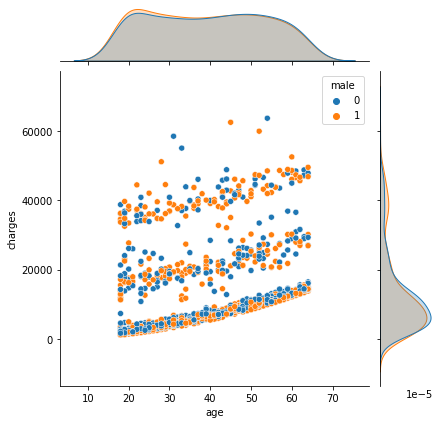

In [33]:
sns.jointplot(x='age',y='charges',data=data,hue='male')

In [34]:
# with  increase in age the charges are increasing for both

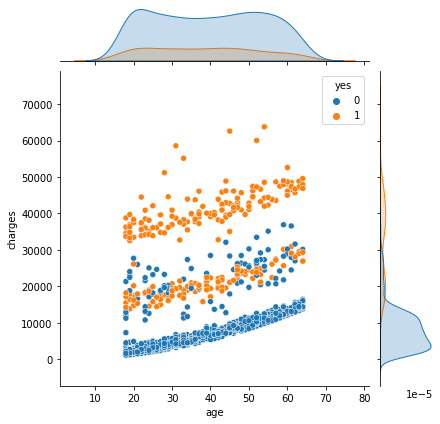

In [35]:
sns.jointplot(x='age',y='charges',data=data,hue='yes')

In [36]:
#the persons are who are smoking ,are the one whose hospital charges are high.

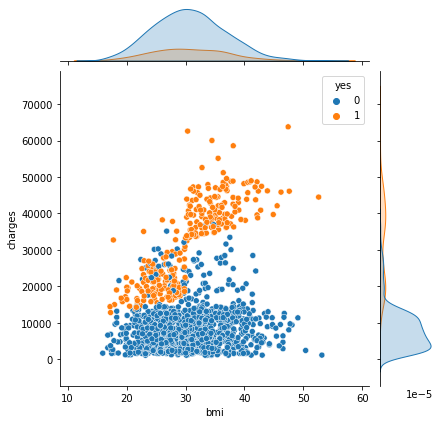

In [37]:
sns.jointplot(x='bmi',y='charges',data=data,hue='yes')

In [38]:
#for the same bmi the persons who are smoking having more charges.

<AxesSubplot:xlabel='male', ylabel='count'>

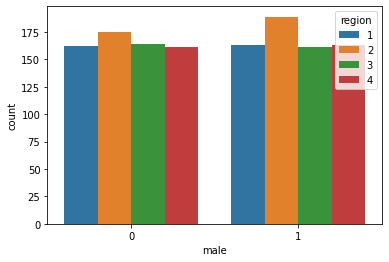

In [39]:
sns.countplot(x='male',data=data,hue="region")

c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

<AxesSubplot:xlabel='region', ylabel='charges'>

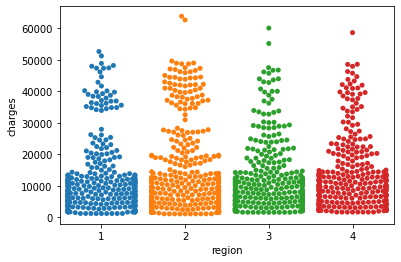

In [57]:
sns.swarmplot(x='region',y='charges',data=data)

In [58]:
#almost all regions people are going on the same scale

c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

<AxesSubplot:xlabel='region', ylabel='bmi'>

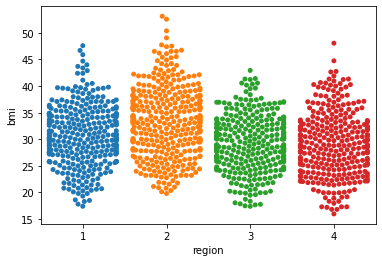

In [59]:
sns.swarmplot(x='region',y='bmi',data=data)

In [61]:
#BMI	Weight Status
#Below 18.5	Underweight
#18.5—24.9	Normal
#25.0—29.9	Overweight
#30.0 and Above	Obese

In [63]:
#most of the region2 people are obesed

<AxesSubplot:xlabel='children', ylabel='bmi'>

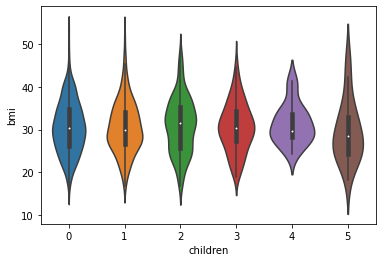

In [64]:
sns.violinplot(x='children',y='bmi',data=data)

<AxesSubplot:xlabel='age', ylabel='bmi'>

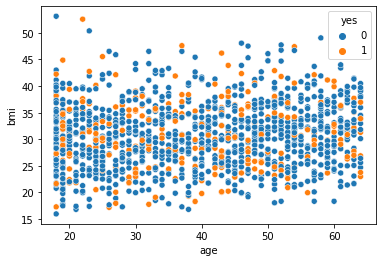

In [71]:
sns.scatterplot(x='age',y='bmi',data=data,hue='yes')

In [69]:
#age is not matters much about bmi

In [41]:
data.columns

Index(['age', 'bmi', 'children', 'region', 'charges', 'yes', 'male'], dtype='object')

In [42]:
X=data[['age', 'bmi', 'children', 'region','yes', 'male']]
y=data['charges']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr=LinearRegression()

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
pred=lr.predict(X_test)

In [49]:
from sklearn import metrics

c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

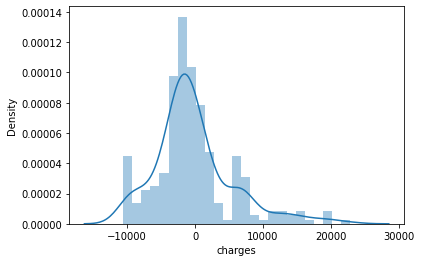

In [50]:
sns.distplot((y_test-pred))

In [51]:
metrics.mean_absolute_error(y_test,pred)

4186.508898366437

In [52]:
metrics.mean_squared_error(y_test,pred)

33635210.431178406

In [53]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

5799.587091438356

c:\users\jaswa\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


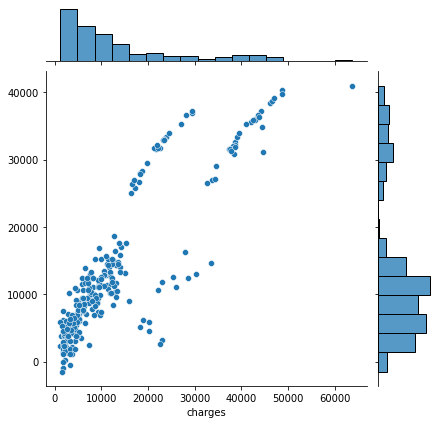

In [54]:
sns.jointplot(y_test,pred)

In [72]:
#through this heatmap, we can say the charges are strongly correlated with age,bmi and smoking.
#few members are spending more,most of the people are spending less than 15000.
#both male and female are equally distributed
#both genders  are doing almost same
#the one who are smoking ,have to spend more charges .
# with  increase in age the charges are increasing for both
#for the same bmi the persons who are smoking having more charges.
#almost all regions people are going on the same scale
#most of the region2 people are obesed
#age is not matters much about bmi.